<a href="https://colab.research.google.com/github/Rsimetti/cursoAP2020/blob/master/%C3%81rvore_de_decis%C3%A3o_e_Floresta_aleat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade da Semana 2 - Árvore de deição e Florestas aleatórias 

Essa atividade consiste em:
- criar um notebook no Google Colab
- realizar a leitura dos dados com pandas 
- realizar a limpeza e organização dos dados para modelagem
- realizar o treinamento de uma árvore de decisão e de uma random forest e o teste
- realizar a análise e interpretação dos resultados obtidos
- incluir as análises no notebook.

## 1. Montagem do drive e importar biblitoecas


In [247]:
# Montaagem do drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [248]:
# Importando as bilbiotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

## 2. Leitura, limpeza e descrição dos dados
Os dados são parte dos dados de um questionário nacional da Indonésia sobre métodos contraceptivos aplicado em 1987. Os indivíduos eram mulheres casadas que não estavam grávidas, ou não sabiam que estavam, no momento da entrevista. 

Fonte: [
Contraceptive Method Choice Data Set](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice)

Descrição das variaveis análisadas:

*   Idade da esposa - Numérica continua
*   Educação da esposa - Categórica (1 = Baixa,2 ,3, 4 = Alta) 
*   Educação do esposo - Categórica (1 = Baixa,2 ,3, 4 = Alta) 
*   Número de filhos nascidos - Numérica continua
*   Religião da esposa - Binária (0 = Não Islamismo, 1 = Islamismo)
*   A esposa está trabalhando? Binário (0 = Sim, 1 = Não)
*   Ocupação do marido - Categórica - (1, 2, 3, 4)
*   Índice do padrão de vida - Categórica (1 = Baixa,2 ,3, 4 = Alta)
*   Exposição a mídia - Binária (0 = Bom, 1 = Não bom)
*   Método contraceptivo usado - Classes (1 = Não usa, 2 = Uso por longo período, 3 = Uso por curto período)



In [249]:
# Impportar e visualização do início e do fim do banco de dados dados 
da = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dados/Contraceptive Method Choice.csv")
da

,WifeAge,WifeEducation,HusbandEducation,NchildrenEverBorn,WifeReligion,WifeNowWorking,HusbandOcupation,StandardOfLivingIndex,MediaExposure,ContraceptiveMethodUsed
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


A fonte dos dados garante não haver dados faltantes, porém foi feita a checagem para garantir que os dados estão completos. Abaixo podem ser observadas as estatisticas descritivas do dados sem estratificação. A ausência de dados faltantes foi confirmada. 
Observando o quadro de estatisticas decritivas, destaca-se que:
 
*   A esposa mais velha tinha 49 anos e a mais nova tinha 16 anos, a idade média era pouco mais que 32 anos.
*   O nível médio de educação das esposas era inferior ao dos maridos.
*   Os casais tinha em média três filhos, snedo que haviam casais sem filhos e casos com até 16 filhos.
*   A maioria das esposas era islâmica e não trabalhava.
*   O índice de padrão de vida médio era alto.

In [250]:
# Remoção de possíveis dados faltantes e esatitstica descritiva da variaiveis 
da = da.dropna()
da.describe()

,WifeAge,WifeEducation,HusbandEducation,NchildrenEverBorn,WifeReligion,WifeNowWorking,HusbandOcupation,StandardOfLivingIndex,MediaExposure,ContraceptiveMethodUsed
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


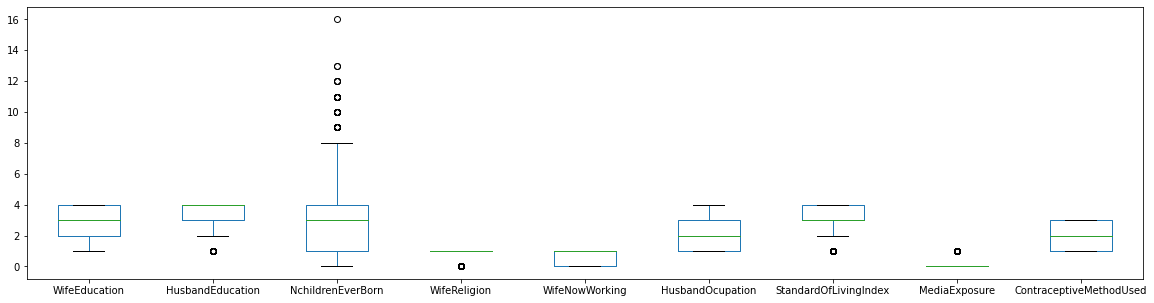

In [251]:
plt.rcParams["figure.figsize"] = (20,5)
da_t = da.drop(columns=['WifeAge'])
da_t.boxplot()
plt.grid()
plt.show()

## 3. Análise preliminar dos dados

### Verificando a ocorrência de cada método contraceptivo utilizado
Foi possível verificar que a maioria dos indivíduos avaliados fazia uso de método contraceptivo, sendo que 333 de curto prazo e 511 de longo prazo, enquanto que 629 não faziam uso de nenhum método contraceptivo.

Não usa: 629
Longo prazo: 333
Curto prazo: 511


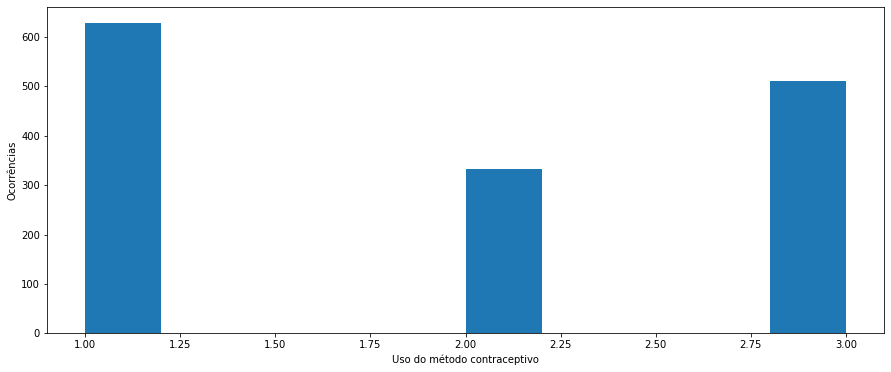

In [252]:
print('Não usa:',da[da["ContraceptiveMethodUsed"]==1].shape[0])
print('Longo prazo:',da[da["ContraceptiveMethodUsed"]==2].shape[0])
print('Curto prazo:',da[da["ContraceptiveMethodUsed"]==3].shape[0])
plt.rcParams["figure.figsize"] = (15,6)
plt.hist(da["ContraceptiveMethodUsed"])
plt.xlabel("Uso do método contraceptivo")
plt.ylabel("Ocorrências")
plt.show()


### Avaliando o efeito da idade dentro da adoção de métodos  contraceptivos

Conforme a figura abaixo, é possível observar que o uso de método contraceptivo por curto prazo é adotado na idades mais jovens, reduzindo sua ocorrência com o aumento da idade. O não-uso de método contraceptivo apresenta dois picos, na idade aproximada de 22 anos (próximo a maior ocrrência do uso de método de curto prazo) e em aproxidamente aos 48 anos, destaca-se que o pico do uso de método de longo prazo no vale de ocorrências do não-uso de método contraceptivo (em aproximadamente 35 anos). 

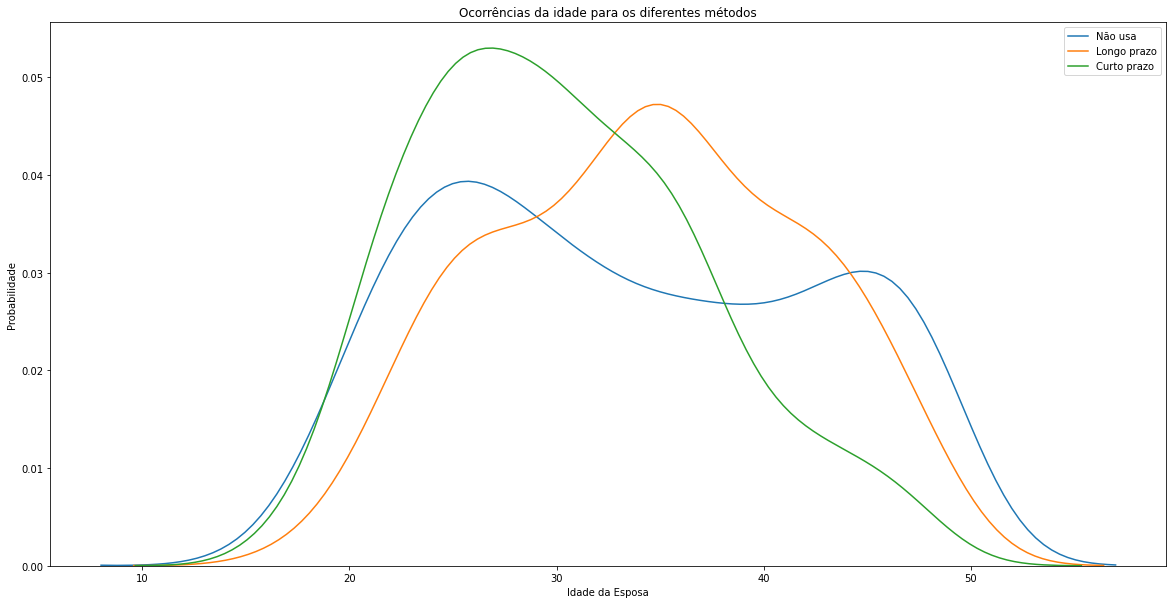

In [253]:
da_1 = da.loc[da['ContraceptiveMethodUsed']  == 1]
da_2 = da.loc[da['ContraceptiveMethodUsed']  == 2]
da_3 = da.loc[da['ContraceptiveMethodUsed']  == 3]

plt.rcParams["figure.figsize"] = (20,10)
sns.distplot(da_1["WifeAge"], hist = False, label = "Não usa")
sns.distplot(da_2["WifeAge"], hist = False, label = "Longo prazo")
sns.distplot(da_3["WifeAge"], hist = False, label = "Curto prazo")
plt.title('Ocorrências da idade para os diferentes métodos')
plt.ylabel("Probabilidade")
plt.xlabel("Idade da Esposa")

plt.show()

### Distribuição da escolaridade das esposas e dos maridos
Em relação ao nível de educação dos maridos e esposas foi possível observar que as esposas apresentam maior frênquencias nas três classes inferiores do que a frequência dos maridos nessas mesmas classes, na maior classe de educação a frequência dos maridos é maior do que das esposas.

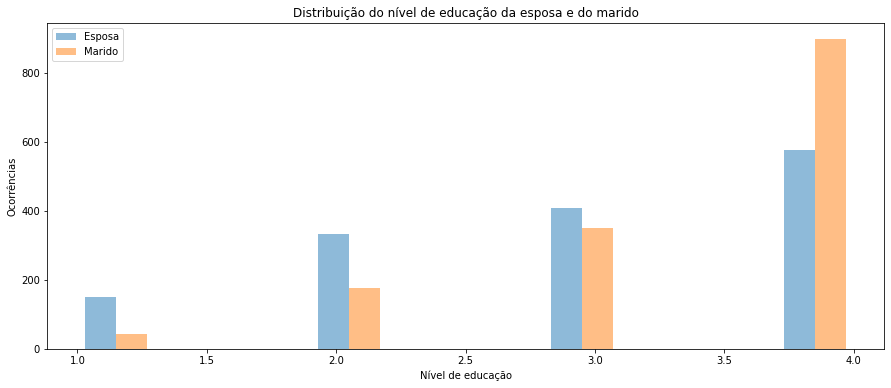

In [254]:
plt.rcParams["figure.figsize"] = (15,6)
plt.hist([da["WifeEducation"], 
          da["HusbandEducation"]], 
         alpha = 0.5, 
         label = ["Esposa", "Marido"] )
plt.title('Distribuição do nível de educação da esposa e do marido')
plt.ylabel("Ocorrências")
plt.xlabel("Nível de educação")
plt.legend()
plt.show()

### Ocorrência do número de filhos
Foi observado que na média mulhres com mais filho são aquelas que adotam métodos contraceptivos, não havendo diferença entre o período de uso para a média de filhos já nascidos. 

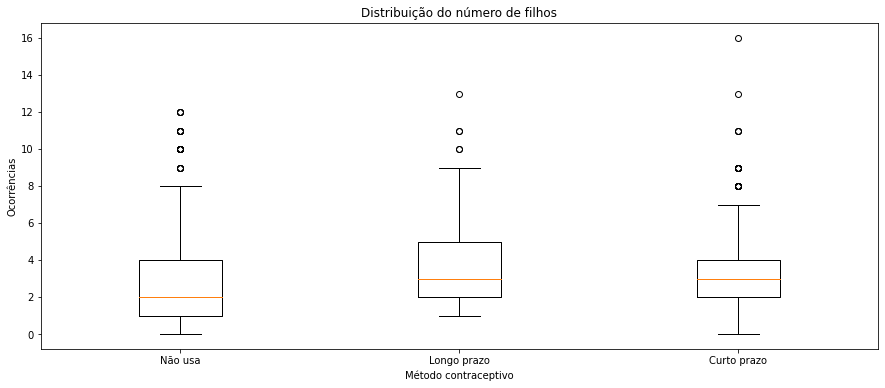

                         count      mean       std  min  25%  50%  75%   max
ContraceptiveMethodUsed                                                     
1                        629.0  2.934817  2.655462  0.0  1.0  2.0  4.0  12.0
2                        333.0  3.738739  2.104406  1.0  2.0  3.0  5.0  13.0
3                        511.0  3.352250  2.049675  0.0  2.0  3.0  4.0  16.0


In [255]:
da_filhos = da.groupby("ContraceptiveMethodUsed")["NchildrenEverBorn"].describe()
plt.rcParams["figure.figsize"] = (15,6)
plt.boxplot([da_1.NchildrenEverBorn,
             da_2.NchildrenEverBorn,
             da_3.NchildrenEverBorn], 
            labels = ["Não usa", "Longo prazo", "Curto prazo"])
plt.title('Distribuição do número de filhos')
plt.ylabel("Ocorrências")
plt.xlabel("Método contraceptivo")
plt.show()
print(da_filhos)

## 4. Correlação entre as variaveis estudadas
Como a variavel obtido da modelagem é o método contraceptivo, adotou-se a correlação de Spearman, para atender aos pressupostos da análise e facilitar a análise, não sendo adotados métodos diferentes para cada par de variaiveis, apesar desta ser a maneira mais indicada de proceder essa análise.

Os valores de correlação observados de maneira geral podem ser considerados baixos. Podem ser destacadas as correlações entre a educação da esposa e do marido (r=0,63), idade da esposa e número de filhos (r=0,56), educação da esposa e ocupação do marido (r=-0,41), indice de padrão de vida com a educação da esposa e do marido (r=0,37 e r=0,35; respectivamente).

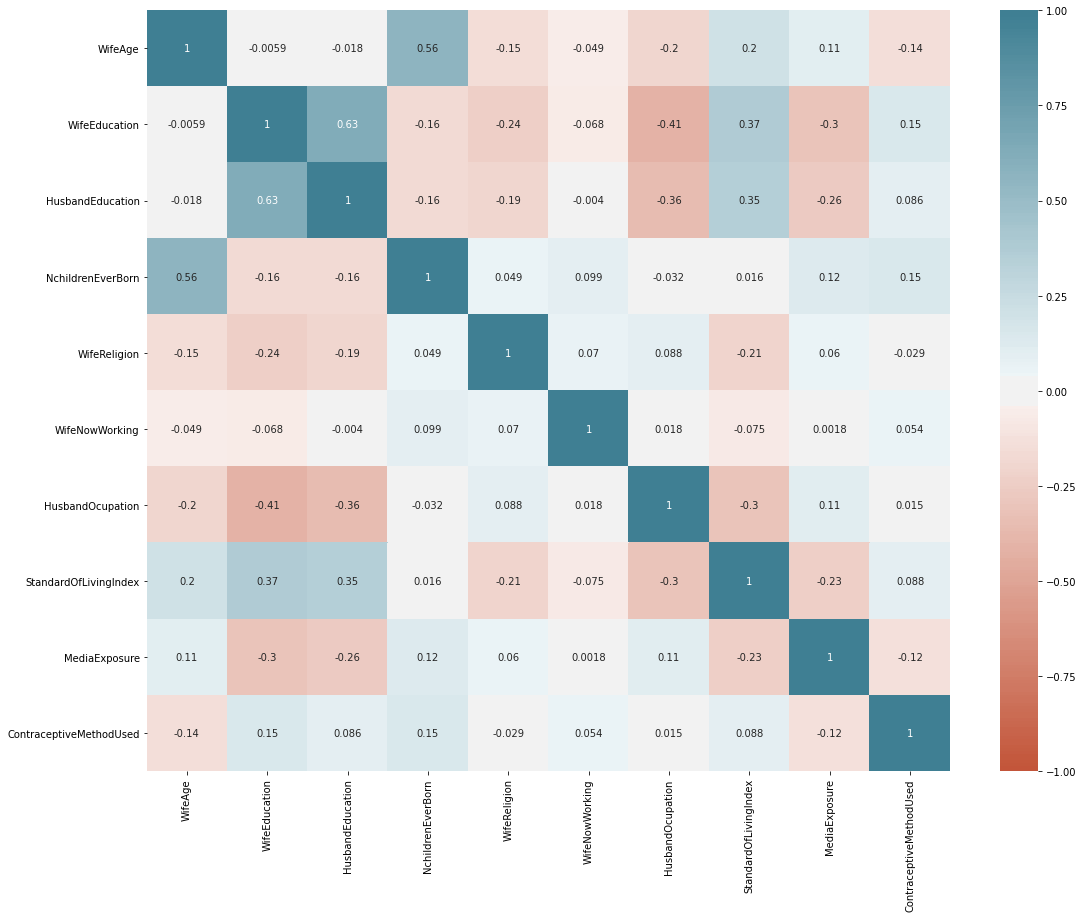

In [256]:
plt.rcParams["figure.figsize"] = (18,14)
corr = da.corr(method = "spearman")
sns.heatmap(corr,
            vmin=-1, 
            vmax=1, 
            center=0, annot = True, 
            cmap=sns.diverging_palette(20, 220, n=200))

## 5. Re-escala e organização dos dados para modelagem
Para a aplicação da árvore de decisão e da floresta aleatória os dados foram transformados utilizando a re-escala de máximo e mínimo. Os dados foram sepadados em variaveis explicativas (X) e variavel resposta (Y). Alem disso os dados foram divididos em lotes de treino e teste, sendo que sub-conjunto de teste foi definido em 20% do banco de dados. 

In [257]:
# Re-escala dos dados
da_r = (da - da.min())/(da.max()-da.min())

In [258]:
X = da_r.iloc[:,:9]
X

,WifeAge,WifeEducation,HusbandEducation,NchildrenEverBorn,WifeReligion,WifeNowWorking,HusbandOcupation,StandardOfLivingIndex,MediaExposure
0,0.242424,0.333333,0.666667,0.1875,1.0,1.0,0.333333,0.666667,0.0
1,0.878788,0.000000,0.666667,0.6250,1.0,1.0,0.666667,1.000000,0.0
2,0.818182,0.333333,0.666667,0.4375,1.0,1.0,0.666667,1.000000,0.0
3,0.787879,0.666667,0.333333,0.5625,1.0,1.0,0.666667,0.666667,0.0
4,0.606061,0.666667,0.666667,0.5000,1.0,1.0,0.666667,0.333333,0.0
...,...,...,...,...,...,...,...,...,...
1468,0.515152,1.000000,1.000000,0.1250,1.0,0.0,0.333333,1.000000,0.0
1469,0.515152,1.000000,1.000000,0.1875,1.0,1.0,0.000000,1.000000,0.0
1470,0.696970,0.666667,0.666667,0.5000,1.0,0.0,0.000000,1.000000,0.0
1471,0.515152,0.666667,0.666667,0.2500,1.0,0.0,0.333333,0.333333,0.0


In [259]:
Y = da.ContraceptiveMethodUsed
Y

0       1
1       1
2       1
3       1
4       1
       ..
1468    3
1469    3
1470    3
1471    3
1472    3
Name: ContraceptiveMethodUsed, Length: 1473, dtype: int64

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

## 6. Árvore de decisão com lotes de treino e teste
Uma vez dividido os lotes foi calculada uma árvore de decisão e então estimada sua acurácia e precisão para cada classe.

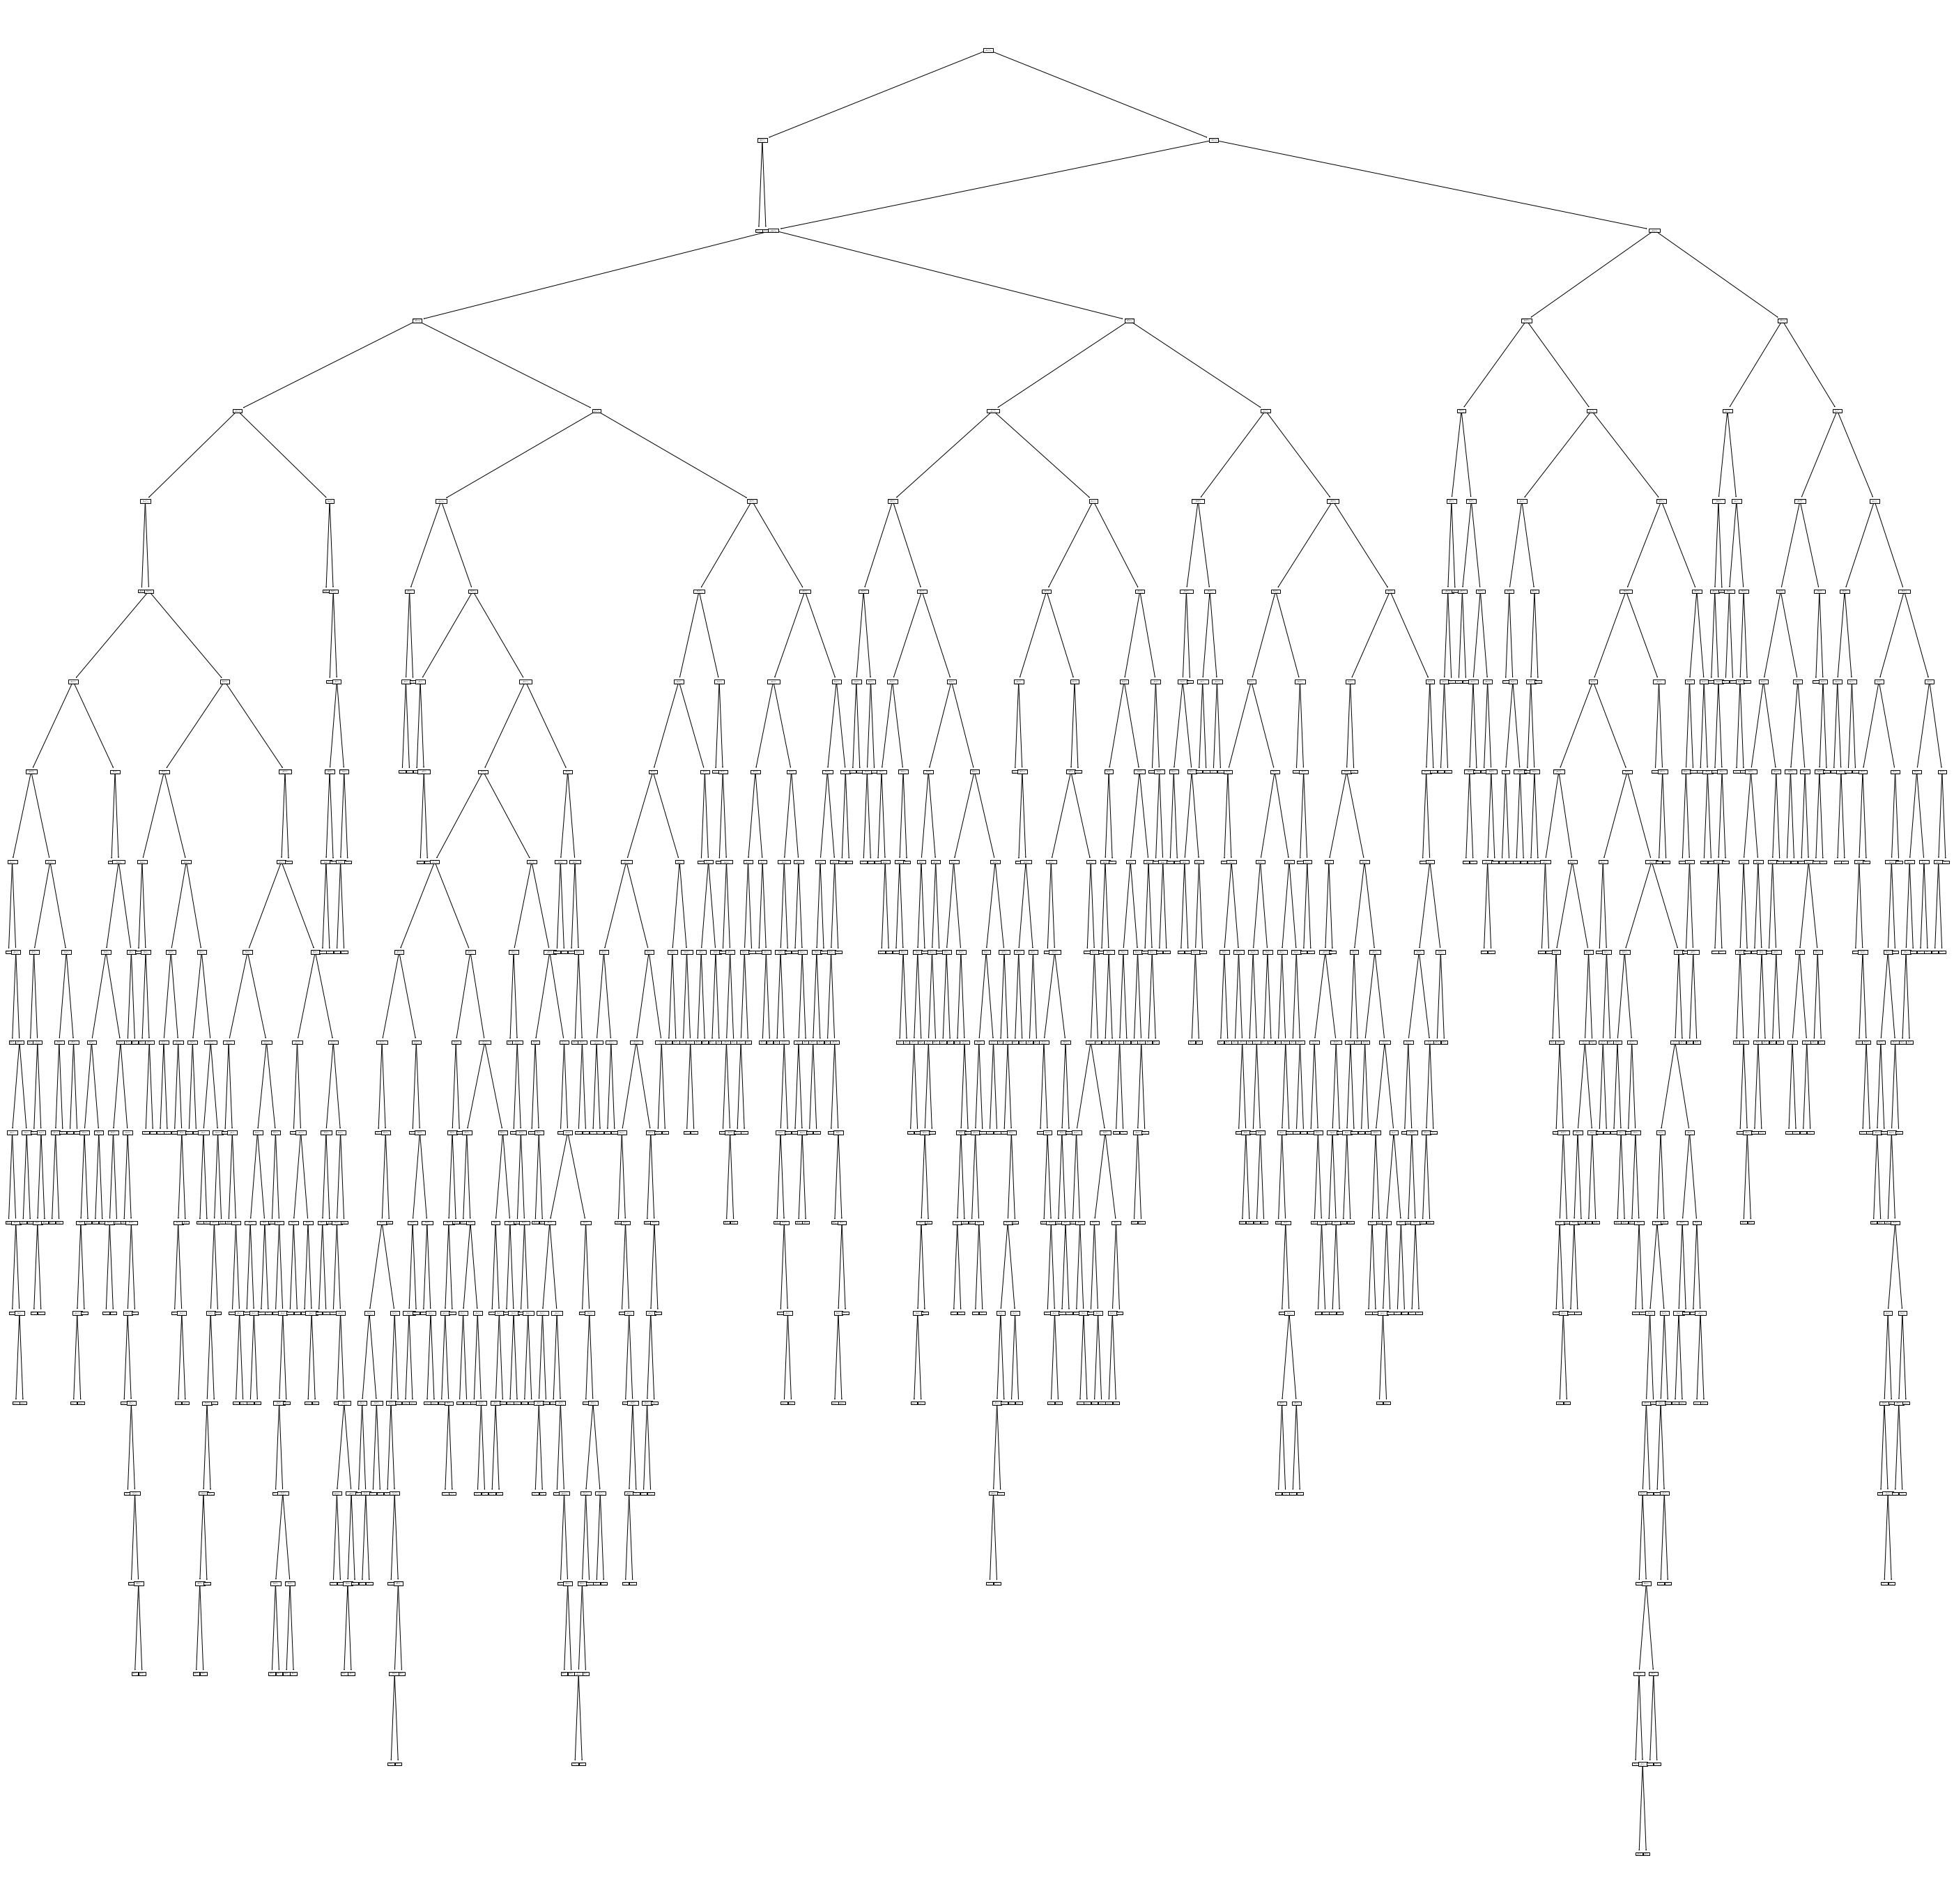

In [260]:
# Calculando a árvore
classificador = DecisionTreeClassifier()
classificador.fit(X_train,Y_train)
plt.rcParams["figure.figsize"] = (50,50)
plot_tree(classificador,
          feature_names=da.columns[1:])
plt.show()

In [261]:
# Calculando as métricas
classificacao = classificador.predict(X_test)
acuracia = accuracy_score(Y_test,classificacao)
precisao = precision_score(Y_test,classificacao, average=None)
print("Acuracia =",acuracia)
print("Precisão =",precisao)

Acuracia = 0.4576271186440678
Precisão = [0.56349206 0.34117647 0.41666667]


A acurácia do modelo da árvore de decisão foi de aproximadamente 45,76%, enquanto a precisão foi de 56,35%; 34,11% e 41,67% para cada uma das classes avaliadas. Dessa forma pode ser o tamanho das amostras de cada classe possam estar interferindo no modelo. 

## 7. Árvore de decisão utilizando validação cruzada
Para avaliar o modelo de maneira mais adequada foi utilizada a validação cruzada, para não haver o efeito de um sorteio favoravel ou desfavoravel na divisão dos lotes de treino e teste.  Como observado abaixo, dependendo do lote de treino a precisão pode variar com valores extremos de quase 0% e 100%, porém a média foi de 49%.

In [262]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
classificador = DecisionTreeClassifier()
scores = cross_val_score(classificador,X,Y,cv= 300)
scores

array([0.6 , 0.8 , 0.2 , 0.6 , 0.6 , 0.4 , 0.8 , 1.  , 0.4 , 0.6 , 1.  ,
       0.6 , 0.6 , 0.2 , 0.2 , 0.8 , 0.8 , 0.4 , 0.2 , 0.8 , 0.6 , 0.6 ,
       0.4 , 0.8 , 0.6 , 0.4 , 0.8 , 0.6 , 0.4 , 0.4 , 0.6 , 0.2 , 0.8 ,
       0.4 , 0.2 , 0.6 , 0.6 , 0.4 , 0.8 , 0.2 , 0.8 , 0.2 , 0.2 , 0.4 ,
       0.4 , 0.2 , 0.4 , 0.2 , 0.6 , 0.6 , 0.6 , 0.6 , 0.4 , 0.6 , 0.2 ,
       0.4 , 0.6 , 0.4 , 0.2 , 0.4 , 0.4 , 0.8 , 0.4 , 0.2 , 0.4 , 0.2 ,
       0.8 , 0.2 , 1.  , 1.  , 0.6 , 0.6 , 0.2 , 0.6 , 0.2 , 0.2 , 1.  ,
       0.4 , 0.4 , 0.2 , 0.6 , 0.4 , 0.  , 0.8 , 0.6 , 0.6 , 0.6 , 0.6 ,
       0.6 , 0.4 , 0.4 , 0.4 , 1.  , 0.2 , 0.2 , 0.6 , 0.8 , 0.4 , 0.4 ,
       0.6 , 0.6 , 0.2 , 0.4 , 0.8 , 0.4 , 0.2 , 0.2 , 0.2 , 0.4 , 0.6 ,
       0.4 , 0.4 , 0.2 , 0.4 , 0.8 , 0.6 , 0.4 , 1.  , 0.4 , 0.2 , 0.4 ,
       0.6 , 0.2 , 0.4 , 0.2 , 0.4 , 0.8 , 0.4 , 0.8 , 0.8 , 0.4 , 0.2 ,
       0.2 , 0.4 , 0.4 , 0.4 , 0.8 , 0.6 , 0.6 , 0.4 , 0.  , 0.6 , 0.2 ,
       0.8 , 0.4 , 0.6 , 0.4 , 0.2 , 0.4 , 0.8 , 0.

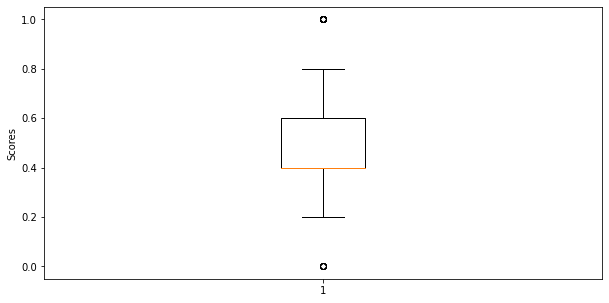

Média =  0.4903333333333334 Desvio =  0.22808599742689648


In [263]:
plt.rcParams["figure.figsize"] = (10,5)
plt.boxplot(scores)
plt.ylabel("Scores")
plt.show()
print("Média = ", scores.mean(), "Desvio = ",scores.std())

### Árvore e Floresta
Realizando agora a comparação entre utilizar uma árvore de decisão e a geração de uma floresta aleatória, utilizando os métodos de divisão de lotes de treino e teste manualmente, e por meio da validação cruzada.

#### Com lotes de treino e teste definidos

In [264]:
# Utilizando lotes de treino e teste gerados manualmente
arvore = DecisionTreeClassifier()
arvore.fit(X_train,Y_train)
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=500)
floresta.fit(X_train,Y_train)
ac_arvore = arvore.score(X_test,Y_test)
ac_floresta = floresta.score(X_test,Y_test)
print("Acurácia Árvore =", ac_arvore, "Acurácia floresta = ", ac_floresta)


Acurácia Árvore = 0.488135593220339 Acurácia floresta =  0.5627118644067797


No caso da divisão manual dos lotes de treino e teste, foi observada maior acurácia para o modelo quando gerado na floresta aleatória. 

#### Com validação cruzada

Para a validação cruzada foram utilizados 50 lotes. Da mesma maneira que a anterior a floresta aleatória foi capaz de gerar um modelo melhor do que a árvoe de decisão.

In [265]:
# Com validação cruzada de 50 lotes
clf_arvore = arvore.predict(X_test)
clf_floresta = floresta.predict(X_test)

#calculando os scores
scores1 = cross_val_score(arvore,X,Y,cv=50)
media1 = round(scores1.mean(),3)
desvio1 = round(scores1.std(),3)


#calculando os scores
scores2 = cross_val_score(floresta,X,Y,cv=50)
media2 = round(scores2.mean(),3)
desvio2 = round(scores2.std(),3)

Árvore, acurácia média = 0.482 Desvio =  0.101
Floresta, acurácia média = 0.511 Desvio =  0.096


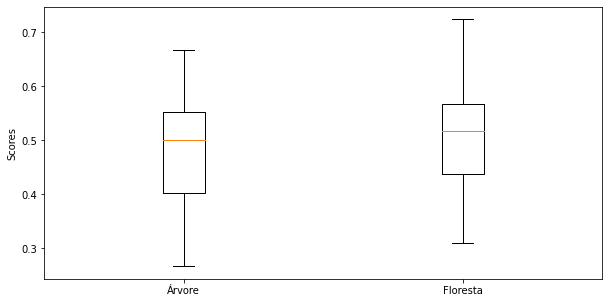

In [266]:
print("Árvore, acurácia média =", media1, "Desvio = ",desvio1)
print("Floresta, acurácia média =", media2, "Desvio = ", desvio2)
plt.rcParams["figure.figsize"] = (10,5)
plt.boxplot([scores1, scores2], 
            labels = ["Árvore", "Floresta"])
plt.ylabel("Scores")
plt.show()

## 8. Considerações finais
Em relação aos modelos gerados é possível afirmar que a acurácia foi baixa para a previsão da classe de método contraceptivo a ser utilizado. 
As árvores de decisão e a floresta aleatória geraram modelos com acurácia semelhante, porém as florestas aleatórias geraram modelos com média de acurácia ligeiramente maiores, o que já era esperado, dado que esse método consiste na geração de diversas árvores para que seja encontrada aquela que melhore as métricas do modelo. 
A baixa relação linear e o desbalanceamento entre as classes podem ser fatores que afetaram negativamente as métricas dos modelos gerados.